# Introduction Convanlution Neural Network and Computer Vision With tensorflow

What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

Getting a dataset to work with

* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
     * Becoming one with the data
     * Preparing data for modelling
     * Creating a CNN model (starting with a baseline)
     *  Fitting a model (getting it to find patterns in our data)
     * Evaluating a model
     * Improving a model
     * Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
  * Same as above (but this time with a different dataset)


In [ ]:
#Get the Data 
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-05-02 02:26:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   248MB/s    in 0.4s    

2022-05-02 02:26:40 (248 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

* A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A test directory with the same structure as the train directory.
Example of file structure

pizza_steak <- top level folder

└───train <- training images

│   └───pizza

│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak

│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   

└───test <- testing images

│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...   
   
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...


In [ ]:
!ls pizza_steak

test  train


In [ ]:
# we can see train and test set
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# walk thorugh pizza_steak directory and list of files

for dirpath,dirnames,filename in os.walk("pizza_steak"):
    print(f"there are {len(dirnames)}, driectory name {len(filename)} , image in {dirpath} ")


there are 2, driectory name 0 , image in pizza_steak 
there are 2, driectory name 0 , image in pizza_steak/train 
there are 0, driectory name 750 , image in pizza_steak/train/steak 
there are 0, driectory name 750 , image in pizza_steak/train/pizza 
there are 2, driectory name 0 , image in pizza_steak/test 
there are 0, driectory name 250 , image in pizza_steak/test/steak 
there are 0, driectory name 250 , image in pizza_steak/test/pizza 


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class names from the dubdirectories

print(class_names)

['pizza' 'steak']




> **🤔 Note:** Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. **Visualize, visualize, visualize**.



In [ ]:
# View an image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# create a simple function view image randomly and return it image 
def view_random_image(target_dir,class_name):
    # Setup target directorie view in (here)
    target_folder = target_dir+class_name
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    # Read in image in target directorie
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
    
    # print the shape of image
    print(f"image shape {img.shape}")
    return img


['861771.jpg']
image shape (512, 384, 3)


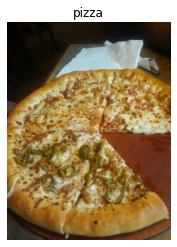

In [ ]:
# call view random image function see image
image = view_random_image("pizza_steak/train/","pizza")


In [ ]:
# why image return becuse image return format array like bunch of numerical format
import tensorflow as tf
tf.constant(image)


<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  2,   3,   0],
        [  2,   3,   0],
        [  2,   3,   0],
        ...,
        [ 57,  32,  12],
        [ 56,  31,  11],
        [ 52,  30,   9]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [ 57,  32,  12],
        [ 56,  31,  11],
        [ 52,  30,   9]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [ 57,  32,  12],
        [ 56,  31,  11],
        [ 52,  30,   9]],

       ...,

       [[ 47,  44,  37],
        [ 45,  42,  35],
        [ 44,  41,  34],
        ...,
        [122, 109,  67],
        [123, 110,  68],
        [123, 110,  68]],

       [[ 47,  44,  37],
        [ 45,  42,  35],
        [ 44,  41,  34],
        ...,
        [123, 110,  68],
        [123, 110,  68],
        [123, 110,  68]],

       [[ 46,  43,  36],
        [ 45,  42,  35],
        [ 44,  41,  34],
        ...,
        [122, 109,  6

In [ ]:
# view image shape
image.shape # return hight , width, color channel

(512, 384, 3)



> **🔑 Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.



In [ ]:
# normalize one single image
image/255.

array([[[0.00784314, 0.01176471, 0.        ],
        [0.00784314, 0.01176471, 0.        ],
        [0.00784314, 0.01176471, 0.        ],
        ...,
        [0.22352941, 0.1254902 , 0.04705882],
        [0.21960784, 0.12156863, 0.04313725],
        [0.20392157, 0.11764706, 0.03529412]],

       [[0.01176471, 0.01568627, 0.        ],
        [0.01176471, 0.01568627, 0.        ],
        [0.01176471, 0.01568627, 0.        ],
        ...,
        [0.22352941, 0.1254902 , 0.04705882],
        [0.21960784, 0.12156863, 0.04313725],
        [0.20392157, 0.11764706, 0.03529412]],

       [[0.01176471, 0.01568627, 0.        ],
        [0.01176471, 0.01568627, 0.        ],
        [0.01176471, 0.01568627, 0.        ],
        ...,
        [0.22352941, 0.1254902 , 0.04705882],
        [0.21960784, 0.12156863, 0.04313725],
        [0.20392157, 0.11764706, 0.03529412]],

       ...,

       [[0.18431373, 0.17254902, 0.14509804],
        [0.17647059, 0.16470588, 0.1372549 ],
        [0.17254902, 0

# An end-to-end example
1. load our data
2. preprocess our data scaling/normilaze
3. create models
4.compile the model
5 fit the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)
# preprocess our image
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
# set path our data
# train_dir = "drive/MyDrive/pizza_steak/train/"
# test_dir = "drive/MyDrive/pizza_steak/test/"
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directory and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of image process at a time
                                               target_size=(224,224),# all convert to 244 to 244
                                               class_mode="binary", # type of problem we are working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)




# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3) # first layer specefic to set input shape (hight,width,color channel)
                         ),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])



# compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 311ms/step - loss: 0.5826 - accuracy: 0.6873 - val_loss: 0.3934 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4236 - accuracy: 0.8120 - val_loss: 0.3377 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3856 - accuracy: 0.8360 - val_loss: 0.3374 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3455 - accuracy: 0.8533 - val_loss: 0.3165 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2891 - accuracy: 0.8840 - val_loss: 0.2755 - val_accuracy: 0.8820



> **🤔 Note:** If the cell above takes more than ~12 seconds per epoch to run,
you might not be using a GPU accelerator. If you're using a Colab notebook, you
can access a GPU accelarator by going to Runtime -> Change Runtime Type ->
all of the above cell as changing the runtime type causes Colab to have to reset. 




Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our
model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classification problem rather then all of the 101 classes in the Food101 dataset, so we can't directly
compare these metrics. That being said, the results so far show that our model is learning something.

> **🛠Practice:** Step through each of the main blocks of code in the cell above,what do you think each is doing? It's okay if you're not sure, we'll go through this soon, In the meantime, spend 10-minutes playing around the incredible [CNN explainer](https://poloclub.github.io/cnn-explainer/) website. what do you notice about the layer names at the top of the webpage?


In [ ]:
# model 1 summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> **🔑 Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

* The data - we're now working with images instead of dots.
* The input shape - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.


In [ ]:
train_data,valid_data


(<keras.preprocessing.image.DirectoryIterator at 0x7f71b0039fd0>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f71bdb21fd0>)

In [ ]:
# setup random seed
tf.random.set_seed(42)

# 1. create the model same as previous section
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

 # 2. compile the model
model_2.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.8389 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# create one more time same mode above but extra add layer and extra add nuron also add learning rate
# setup random seed
tf.random.set_seed(42)
# 1. create the model
model_3 = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=( 224, 224, 3)),
   tf.keras.layers.Dense(100,activation="relu"),
   tf.keras.layers.Dense(100,activation="relu"),
   tf.keras.layers.Dense(100, activation="relu"),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model 
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
# 3. fit the model  and store histroy
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 188ms/step - loss: 43.3344 - accuracy: 0.5347 - val_loss: 6.6534 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 1.2702 - accuracy: 0.6840 - val_loss: 0.6353 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6025 - accuracy: 0.7453 - val_loss: 0.6091 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5568 - accuracy: 0.7487 - val_loss: 0.5137 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4987 - accuracy: 0.7800 - val_loss: 0.4878 - val_accuracy: 0.7640


# Binary classification: Let's break it down
We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.



### 1. Become one with the data(visualize, visualize, visualize)

['1937872.jpg']
image shape (512, 512, 3)
['3749515.jpg']
image shape (512, 512, 3)


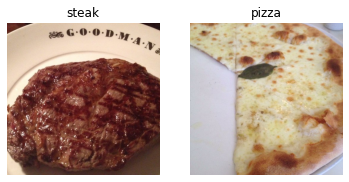

In [ ]:
# visulaize our data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess our data (prepare it for model)

In [ ]:
# Define train and test directory path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# # andry code 
# train_dir = "pizza_steak/train/"
# test_dir = "pizza_steak/test/"


Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?



In [ ]:
# # turn our data into batches
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

* Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
* The `target_size` parameter defines the input size of our images in (height, width) format.
* The `class_mode` value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the train_data object.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
# Let's see image look like
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# Let's cheack another image size
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batches of label
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with a baseline)
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> **🔑 Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.



In [ ]:
# Make the creating our model a little easiar
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import Sequential


In [ ]:
# create the model
model_4 = Sequential([
   Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu',
          input_shape=(224, 224, 3)), # input layers specify input shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # out put layer (specify output shape)
])



In [ ]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])




### Fit the model

In [ ]:
# check lan of training data testing data
len(train_data),len(test_data)

(47, 16)

In [ ]:
# # fit the model
# history_4 = model_4.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

# andry code
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.4889 - accuracy: 0.6120 - val_loss: 0.5109 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4883 - accuracy: 0.7827 - val_loss: 0.4174 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3695 - accuracy: 0.8540 - val_loss: 0.3785 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2357 - accuracy: 0.9180 - val_loss: 0.4091 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1228 - accuracy: 0.9620 - val_loss: 0.4981 - val_accuracy: 0.7960


### Evaluate The model

Yehaaa! Look like model learning something

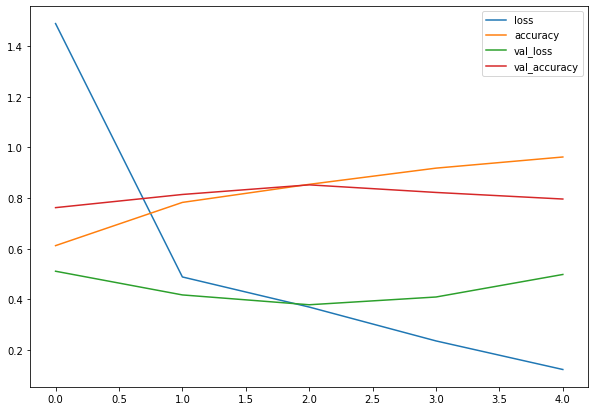

In [ ]:
# create loss curv
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# let's see sparetly to loss and accuracy
# creat function loss curv
def plot_loss_curv(history):
    """
    Get history of model see losses and accuracy
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    # accuracy get
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    # epoch set
    epoch = range(len(history.history["loss"]))
    # show loss plot
    plt.plot(epoch,loss,label="training loss")
    plt.plot(epoch,val_loss,label="testing loss")
    plt.title("Loss")
    plt.xlabel("epoch")
    plt.legend()
    # create accuracy plot
    plt.figure()
    plt.plot(epoch,accuracy,label="training accuracy")
    plt.plot(epoch,val_accuracy,label="testing accuracy")
    plt.title("Accuracy")
    plt.xlabel("epoch")
    plt.legend()


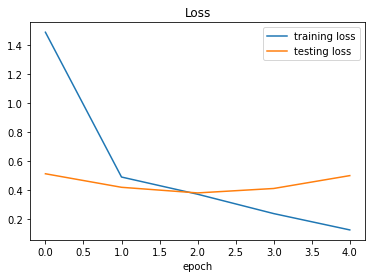

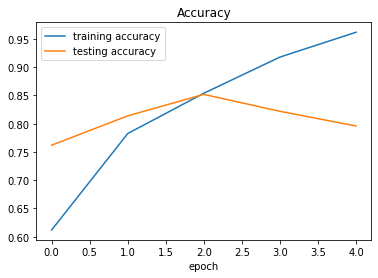

In [ ]:
plot_loss_curv(history_4)

### Adjust the model parameter

Fitting a machine learning model comes in 3 steps:
1. Create a basline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

So fas we've gone through steps 0 and 1.

And there are ever a few more things we could try to furter overfit our model:
* Increase the number of convolutinal layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattend lyers.

Reduce overfiting:
* Add Data Argmentation
* Add Ragulization layer (such as MaxPool2D())
* Add more Data...

> **🔑 Note:** Reducing overfiting is also know as Ragulization
 
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.




In [ ]:
# create model 5 
tf.random.set_seed(42)
# 1. create the model
model_5 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [ ]:
# 2 . compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# 3. fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6192 - accuracy: 0.6480 - val_loss: 0.4605 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4492 - accuracy: 0.8020 - val_loss: 0.3457 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4284 - accuracy: 0.8120 - val_loss: 0.3479 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4121 - accuracy: 0.8060 - val_loss: 0.3447 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3682 - accuracy: 0.8440 - val_loss: 0.2920 - val_accuracy: 0.8920


In [ ]:
# let's see summary of model_5 use MaxPool2D() get importent features
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# let's see summary of model_4 don't use MaxPool2D()
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


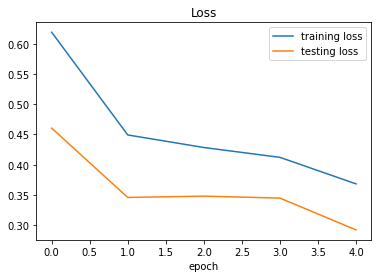

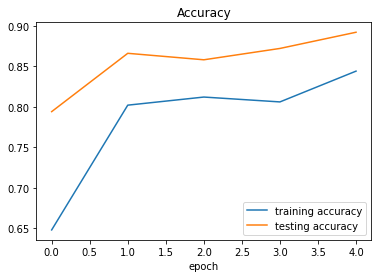

In [ ]:
# let's see loss curve model 5
plot_loss_curv(history_5)

Now see train and test data close ly each other not overfitting our model let's ok .

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.



In [ ]:
# Create data sugmentation 
train_datagen_augment = ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

# Crate ImageDataGenrerator instance of training dataset without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
# Create ImageDataGenrator instance of testing testing dataset withour augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


> 🤔 **Question:** What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.



In [ ]:
# Import data and augment it from training directory
print("Augmented data...")
train_data_augmented = train_datagen_augment.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 class_mode="binary",
                                                                 batch_size=32,
                                                                 shuffle=False)
# orginal image
print("Orginal training data...")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=False)
# orginal image test data
print("Orginal testing data...")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)


Augmented data...
Found 1500 images belonging to 2 classes.
Orginal training data...
Found 1500 images belonging to 2 classes.
Orginal testing data...
Found 500 images belonging to 2 classes.


In [ ]:
# Get the batch of sample
images , labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Number of images : 2


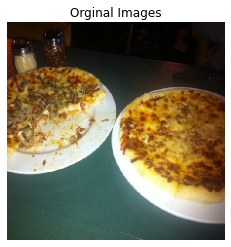

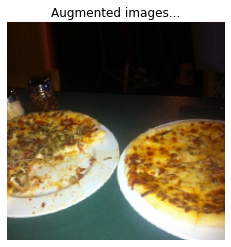

In [ ]:
# Show image randomly
# random number set
import random
random_number = random.randint(0,32) # batch size 32 same random number

print(f"Number of images : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Orginal Images")
plt.axis(False);
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented images...")
plt.axis(False);



After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.



In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# same model create but use data augmentd data
tf.random.set_seed(42)
# 1. create the model
model_6  = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])


In [ ]:
# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# 3. fit the model
history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.7286 - accuracy: 0.5353 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6967 - accuracy: 0.4833 - val_loss: 0.6843 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6891 - accuracy: 0.5760 - val_loss: 0.6744 - val_accuracy: 0.6160
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6963 - accuracy: 0.5413 - val_loss: 0.6722 - val_accuracy: 0.5700
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6589 - accuracy: 0.6227 - val_loss: 0.5684 - val_accuracy: 0.8120


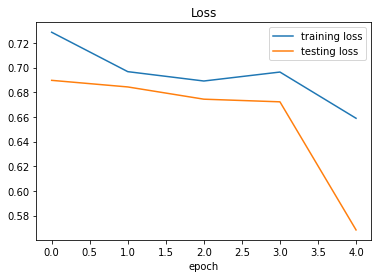

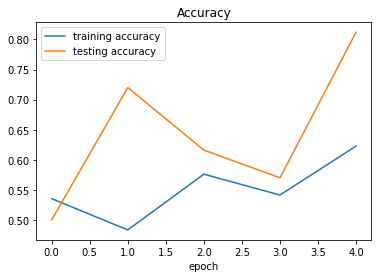

In [ ]:
plot_loss_curv(history_6)

In [ ]:
# now create same augmented but this time data is shuffle
train_data_augmented_shuffle = train_datagen_augment.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         class_mode="binary",
                                                                         batch_size=32,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# create the model same as (model_6)
# 1. create the model
model_7 = Sequential([
   Conv2D(10, 3, activation="relu",input_shape=(224,224,3)),
   MaxPool2D(pool_size=2),
   Conv2D(10,3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1,activation="sigmoid")
])

# 2. compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# 3. fit the model
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6715 - accuracy: 0.5960 - val_loss: 0.5822 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5706 - accuracy: 0.7173 - val_loss: 0.4443 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5197 - accuracy: 0.7673 - val_loss: 0.4092 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5222 - accuracy: 0.7493 - val_loss: 0.4187 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5091 - accuracy: 0.7613 - val_loss: 0.3961 - val_accuracy: 0.8180


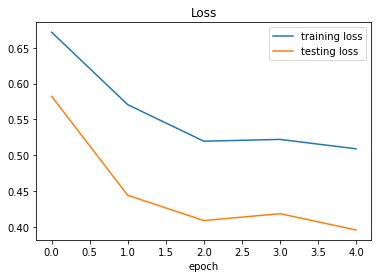

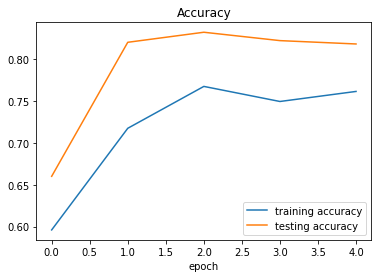

In [ ]:
plot_loss_curv(history_7)

### 7. Repeat until satisified
We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
* Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.



In [ ]:
# create model same data set use but increase some of hyperparameter
model_8 = Sequential([
   Conv2D(32,3,activation="relu",input_shape=(224,224,3)),
   Conv2D(32,3,activation="relu"),
   MaxPool2D(),
   Conv2D(32,3,activation="relu"),
   Conv2D(32,3,activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
# 3. fit the model
model_8.fit(train_data_augmented_shuffle,
            epochs=10,
            steps_per_epoch=len(train_data_augmented_shuffle),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 526ms/step - loss: 0.6478 - accuracy: 0.6187 - val_loss: 0.4290 - val_accuracy: 0.7980
Epoch 2/10
47/47 [==============================] - 23s 497ms/step - loss: 0.5310 - accuracy: 0.7427 - val_loss: 0.4405 - val_accuracy: 0.8040
Epoch 3/10
47/47 [==============================] - 23s 496ms/step - loss: 0.4860 - accuracy: 0.7740 - val_loss: 0.3507 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 24s 500ms/step - loss: 0.4819 - accuracy: 0.7813 - val_loss: 0.3417 - val_accuracy: 0.8520
Epoch 5/10
47/47 [==============================] - 23s 499ms/step - loss: 0.4976 - accuracy: 0.7600 - val_loss: 0.3434 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 23s 498ms/step - loss: 0.4744 - accuracy: 0.7800 - val_loss: 0.3364 - val_accuracy: 0.8620
Epoch 7/10
47/47 [==============================] - 23s 497ms/step - loss: 0.4313 - accuracy: 0.8133 - val_loss: 0.3254 - val_accuracy: 0.8620

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

### Make a Prediction our costome image in recent model

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-05-02 02:39:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-05-02 02:39:44 (89.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

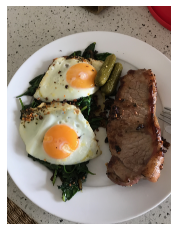

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak_images = mpimg.imread("03-steak.jpeg")
plt.imshow(steak_images)
plt.axis(False)

In [ ]:
steak_images.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_images(fileName,im_shape=224):
    """
    Read the file and reshape and preprocess image and return
    """
    # read the file
    image = tf.io.read_file(fileName)
    # decode the image
    image = tf.image.decode_image(image)
    # resize the image
    image = tf.image.resize(image,size=[im_shape,im_shape])
    # preprocess image 
    image = image / 255.
    # return the image
    return image
    

In [ ]:
steak_image = load_and_prep_images("03-steak.jpeg")
steak_image.shape

TensorShape([224, 224, 3])

In [ ]:
# now image predict
image_prob = model_8.predict(tf.expand_dims(steak_image,axis=0))
image_prob

array([[0.8647364]], dtype=float32)

In [ ]:
int(tf.round(image_prob))

1

In [ ]:
model_predict_result = class_names[int(tf.round(image_prob))]
model_predict_result

'steak'

In [ ]:
# one 
pizza_images = load_and_prep_images("drive/MyDrive/03_convulation_predict_image/03-pizza_image.jpg")
pizza_images.shape

In [ ]:
pizza_prob = model_8.predict(tf.expand_dims(pizza_images,axis=0))
pizza_prob

In [ ]:
model_predict_result_2 = class_names[int(tf.round(pizza_prob))]
model_predict_result_2

In [ ]:
def model_pred_plot(model,file_name,class_name=class_names):
    """
    get image and preprocess and model predict and also plot which is one.
    """
    # load image and preprocessing
    images = load_and_prep_images(file_name)
    # model predict probability
    images_pred = model.predict(tf.expand_dims(images,axis=0))
    # class name get
    print(f"Image probabilty is : {images_pred}")
    class_name = class_names[int(tf.round(images_pred))]
    # plot the images
    plt.imshow(images)
    plt.title(f"Model Prediction is {class_name}")
    plt.axis(False)

In [ ]:
model_pred_plot(model_8,"drive/MyDrive/03_convulation_predict_image/03-pizza_image.jpg")

In [ ]:
# # try it one more another images 
model_pred_plot(model_8,"drive/MyDrive/03_convulation_predict_image/SteakPizza.jpg")

# Mult-Class Classfication

bunch of step flow this problem working on .

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied


### 1. Become one with the data (visualize, visualize, visualize...)

In [ ]:
# import image
import zipfile
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

# unzip file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
# extract all 
zip_ref.extractall()
zip_ref.close()

--2022-05-02 02:39:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   102MB/s    in 5.0s    

2022-05-02 02:39:52 (99.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# check how many class and how many image have also check how many directory have
import os
for dirpath,dirname,filename in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirname)} directory and {len(filename)} images in {dirpath}")

In [ ]:
# set up directory 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [ ]:
# Get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['1122994.jpg']
image shape (512, 512, 3)


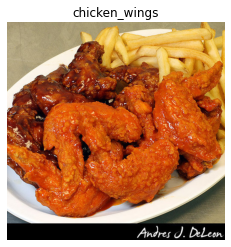

In [ ]:
# let's visualize our image randomly
import random
img = view_random_image(target_dir=train_dir,class_name=random.choice(class_names))


###  2. Preprocess the dat

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential 


In [ ]:
# Create the model
tf.random.set_seed(42)
# 1. create the model
model_9 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

In [ ]:
# 2. compile the model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])
# 3. fit the model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 196ms/step - loss: 2.1253 - accuracy: 0.2201 - val_loss: 2.0221 - val_accuracy: 0.2756
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 1.9005 - accuracy: 0.3424 - val_loss: 1.9197 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.6484 - accuracy: 0.4392 - val_loss: 1.8888 - val_accuracy: 0.3604
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 1.1739 - accuracy: 0.6079 - val_loss: 2.1730 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.5616 - accuracy: 0.8220 - val_loss: 2.7901 - val_accuracy: 0.3172


### 4. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 20s 255ms/step - loss: 2.7901 - accuracy: 0.3172


[2.7900800704956055, 0.3172000050544739]

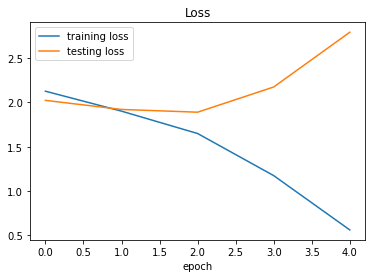

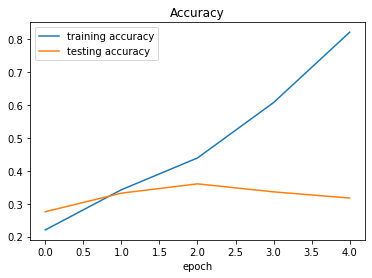

In [ ]:
plot_loss_curv(history=history_9)

let's see our model is **overfitting** let's modefied some paramete change improve it model. 

### 6. Adjust different parameters and improve model (try to beat your baseline)


1. **Get more data -** Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
2. **Simplify model -** If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
3. **Use data augmentation -** Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
4. **Use transfer learning -** Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.


In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 45s 188ms/step - loss: 2.2917 - accuracy: 0.1701 - val_loss: 2.1815 - val_accuracy: 0.1880
Epoch 2/5
235/235 [==============================] - 48s 204ms/step - loss: 1.9639 - accuracy: 0.3216 - val_loss: 2.1190 - val_accuracy: 0.2484
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.5345 - accuracy: 0.4848 - val_loss: 2.1879 - val_accuracy: 0.2504
Epoch 4/5
235/235 [==============================] - 44s 185ms/step - loss: 0.9758 - accuracy: 0.6879 - val_loss: 2.5053 - val_accuracy: 0.2564
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.5292 - accuracy: 0.8441 - val_loss: 3.0790 - val_accuracy: 0.2540


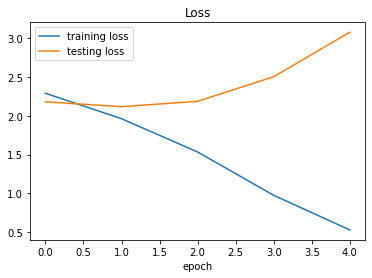

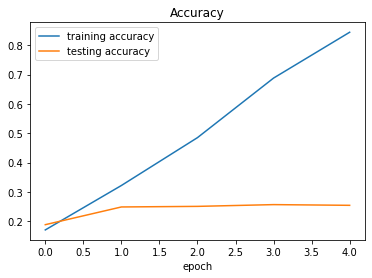

In [ ]:
plot_loss_curv(history_10)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about data augmentation?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images.



In [ ]:
# clone the model
model_11 = tf.keras.models.clone_model(model_9)
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# now data augmanted
train_datagen_augmanted = ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

train_data_augmanted = train_datagen_augmanted.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])
# fit the model
history_11 = model_11.fit(train_data_augmanted,
             epochs=5,
             steps_per_epoch=len(train_data_augmanted),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 479ms/step - loss: 2.2162 - accuracy: 0.1679 - val_loss: 2.0793 - val_accuracy: 0.2456
Epoch 2/5
235/235 [==============================] - 112s 478ms/step - loss: 2.0869 - accuracy: 0.2571 - val_loss: 1.9292 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 115s 491ms/step - loss: 2.0346 - accuracy: 0.2784 - val_loss: 1.8878 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 131s 557ms/step - loss: 1.9805 - accuracy: 0.3096 - val_loss: 1.8080 - val_accuracy: 0.3820
Epoch 5/5
235/235 [==============================] - 116s 494ms/step - loss: 1.9418 - accuracy: 0.3305 - val_loss: 1.8448 - val_accuracy: 0.3492


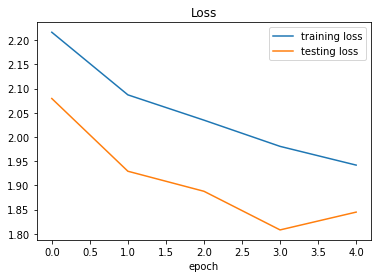

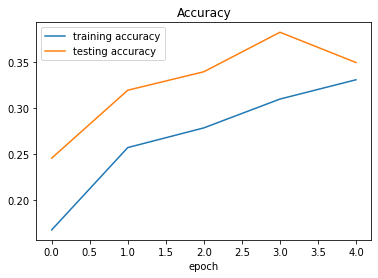

In [ ]:
plot_loss_curv(history_11)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

### 7. Repeat until satisfied
We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
* Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.


In [ ]:
# clone the model and train the longer 
model_12 = tf.keras.models.clone_model(model_9)
# compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])
# fit the model
history_12 = model_12.fit(train_data_augmanted,
                          epochs=5,
                         steps_per_epoch=len(train_data_augmanted),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 482ms/step - loss: 2.2035 - accuracy: 0.1780 - val_loss: 2.0414 - val_accuracy: 0.2684
Epoch 2/5
235/235 [==============================] - 112s 478ms/step - loss: 2.0670 - accuracy: 0.2616 - val_loss: 1.8912 - val_accuracy: 0.3248
Epoch 3/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9906 - accuracy: 0.3061 - val_loss: 1.8023 - val_accuracy: 0.3852
Epoch 4/5
235/235 [==============================] - 113s 480ms/step - loss: 1.9388 - accuracy: 0.3279 - val_loss: 1.7761 - val_accuracy: 0.3952
Epoch 5/5
235/235 [==============================] - 113s 482ms/step - loss: 1.9140 - accuracy: 0.3335 - val_loss: 1.7926 - val_accuracy: 0.3948


### Make a predication our custom images


In [ ]:
# Adjust function to work with multi-class
def model_pred_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [ ]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg"
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg"

--2022-05-02 03:25:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-05-02 03:25:55 (117 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-05-02 03:25:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

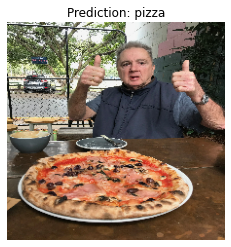

In [ ]:
model_pred_plot(model=model_12,filename="03-pizza-dad.jpeg",class_names=class_names)

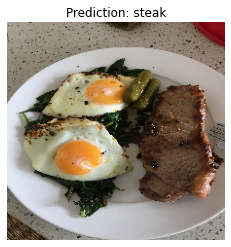

In [ ]:
model_pred_plot(model_12,"03-steak.jpeg",class_names)


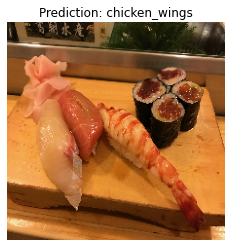

In [ ]:
model_pred_plot(model_12,filename="03-sushi.jpeg",class_names=class_names)

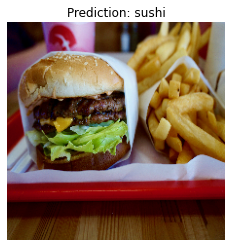

In [ ]:
model_pred_plot(model_12,filename="03-hamburger.jpeg",class_names=class_names)

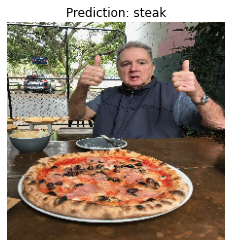

In [ ]:
# same function work on binary classfication
model_pred_plot(model_8,filename="03-pizza-dad.jpeg",class_names=["pizza","steak"]) # this time check only binary classfication 

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

look like's our model didn't work very well custom images

# Save an loading model (And Check real model evalutaion and loaded model evalutaion)

In [ ]:
model_12.save("save_trained_model")

INFO:tensorflow:Assets written to: save_trained_model/assets


In [ ]:
# loaded model
load_model = tf.keras.models.load_model("save_trained_model")
load_model.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.7926 - accuracy: 0.3948


[1.7925509214401245, 0.39480000734329224]

In [ ]:
# chack same as save model
model_12.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 1.7926 - accuracy: 0.3948


[1.7925505638122559, 0.39480000734329224]